In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import tskit
import numpy as np
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/terracotta")
import terracotta as tct
import importlib
importlib.reload(tct)
from scipy import linalg

In [2]:
demes = pd.read_csv("datasets/evolution_take_3/demes.tsv", sep="\t")
samples = pd.read_csv("datasets/evolution_take_3/samples.tsv", sep="\t")
world_map = tct.WorldMap(demes, samples)

trees = [tskit.load(ts).simplify().first() for ts in glob(f"datasets/evolution_take_3/trees/*")]

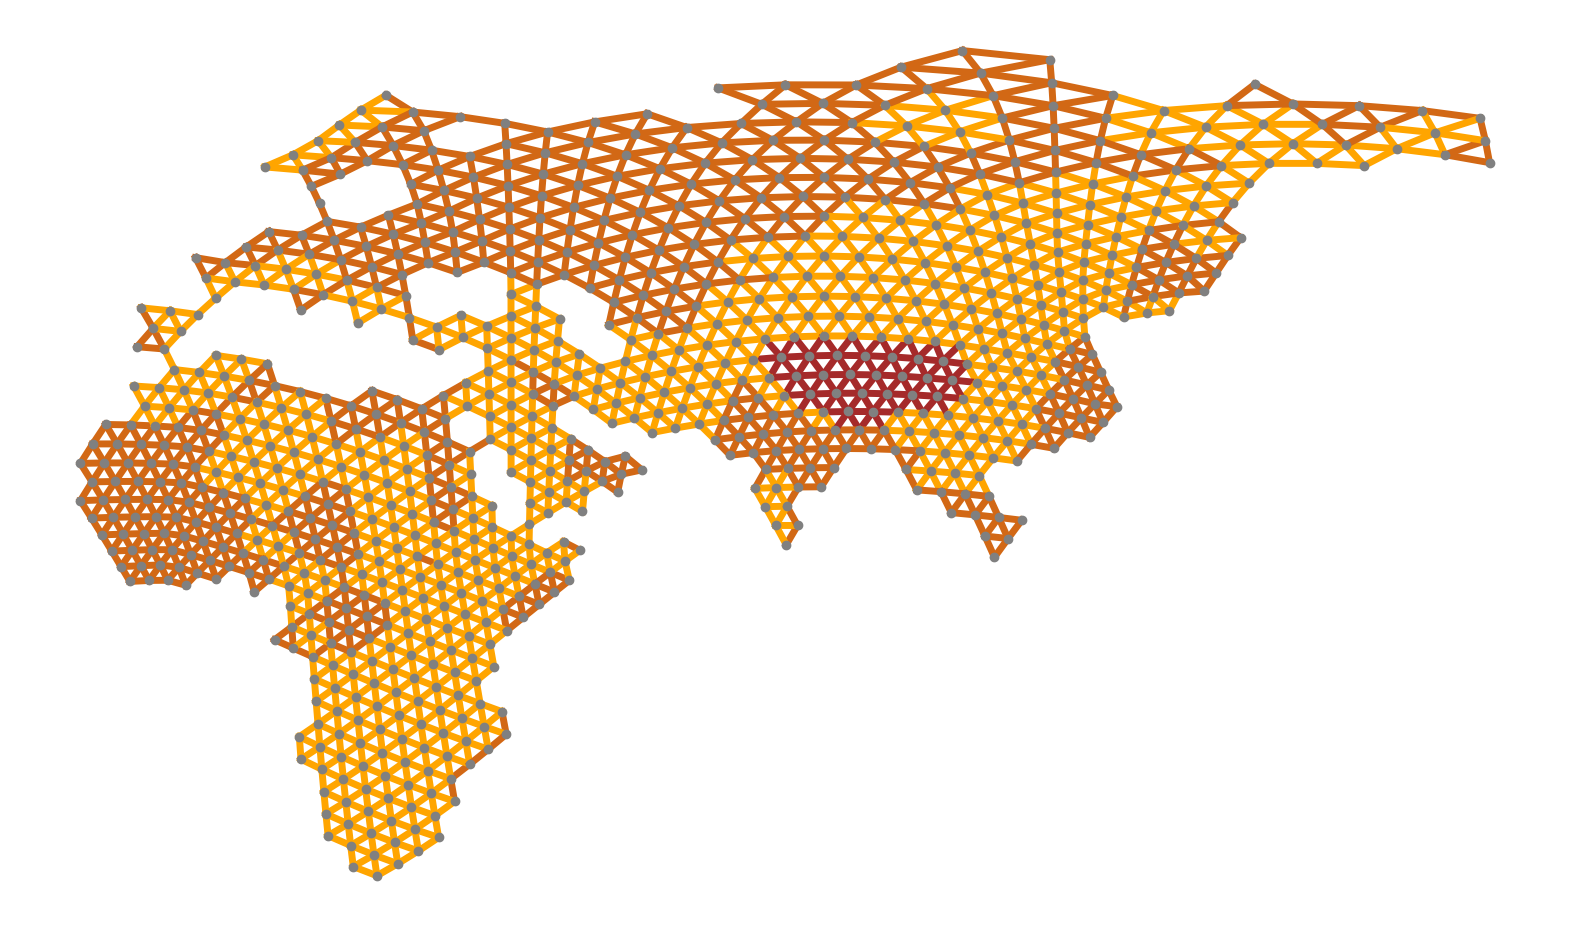

In [3]:
world_map.draw(
    figsize=(20,20),
    color_connections=True,
    migration_rates={0:0.5, 1:1, 2:0},
    save_to="migration_surface_take_3.svg"
)

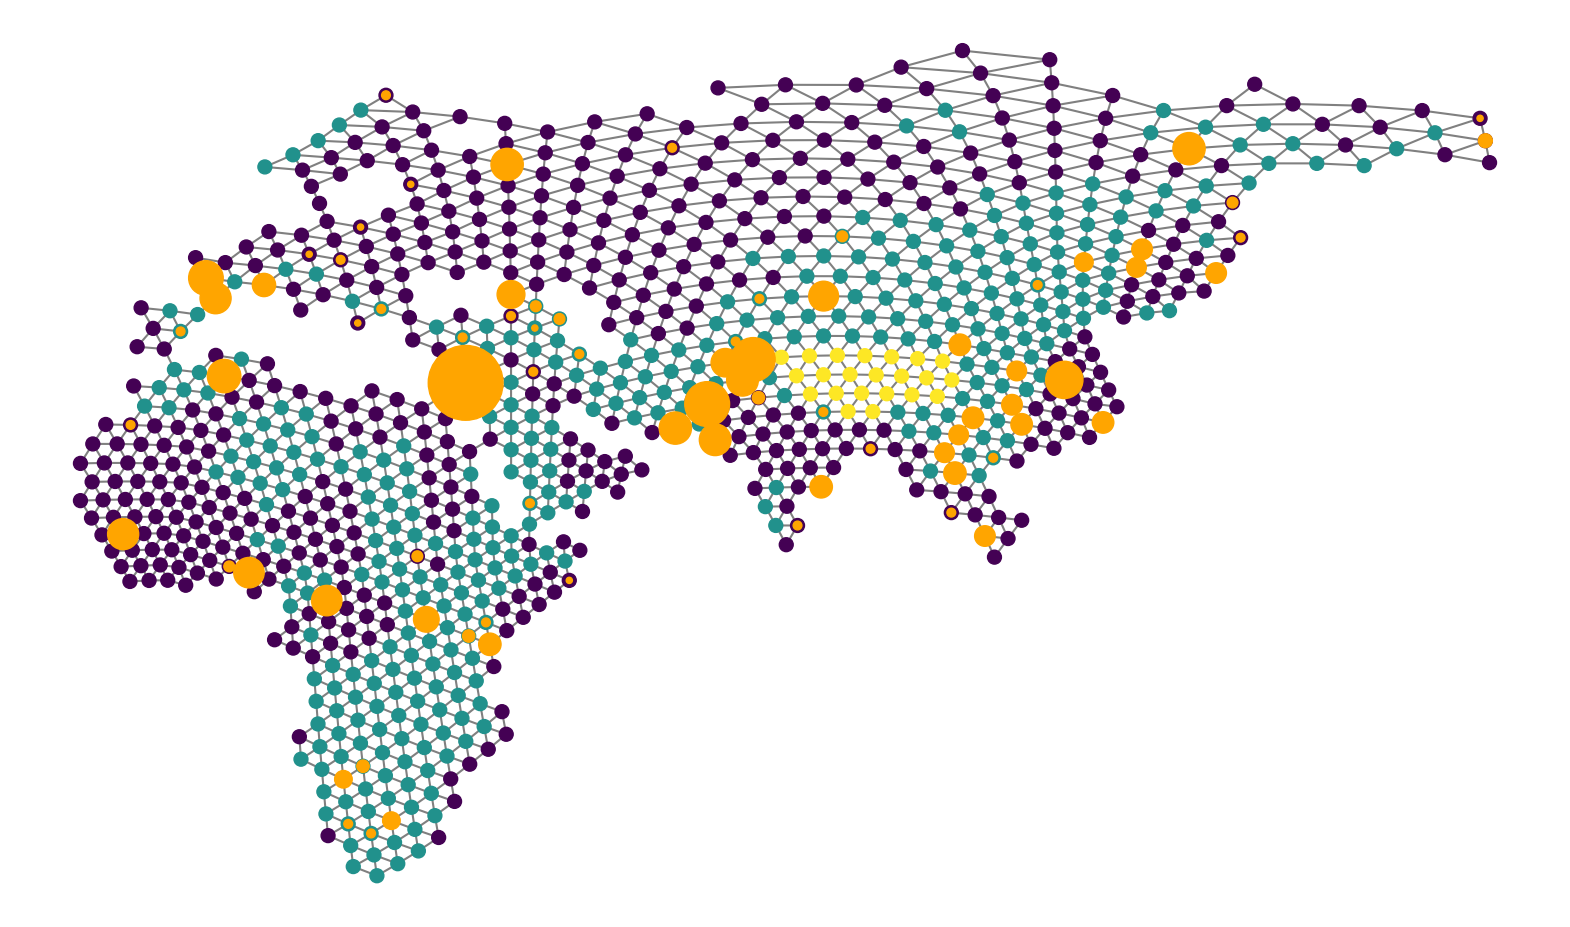

In [6]:
world_map.draw(
    color_demes=True,
    show_samples=True,
    figsize=(20,20),
    save_to="evolution_take_3.svg"
)

In [3]:
positions_1500 = tct.track_lineage_over_time(
    sample=1500,
    times=range(0,20100,100),
    tree=trees[50],
    world_map=world_map,
    migration_rates=np.array([0.00431724, 0.04949343, 0])
)

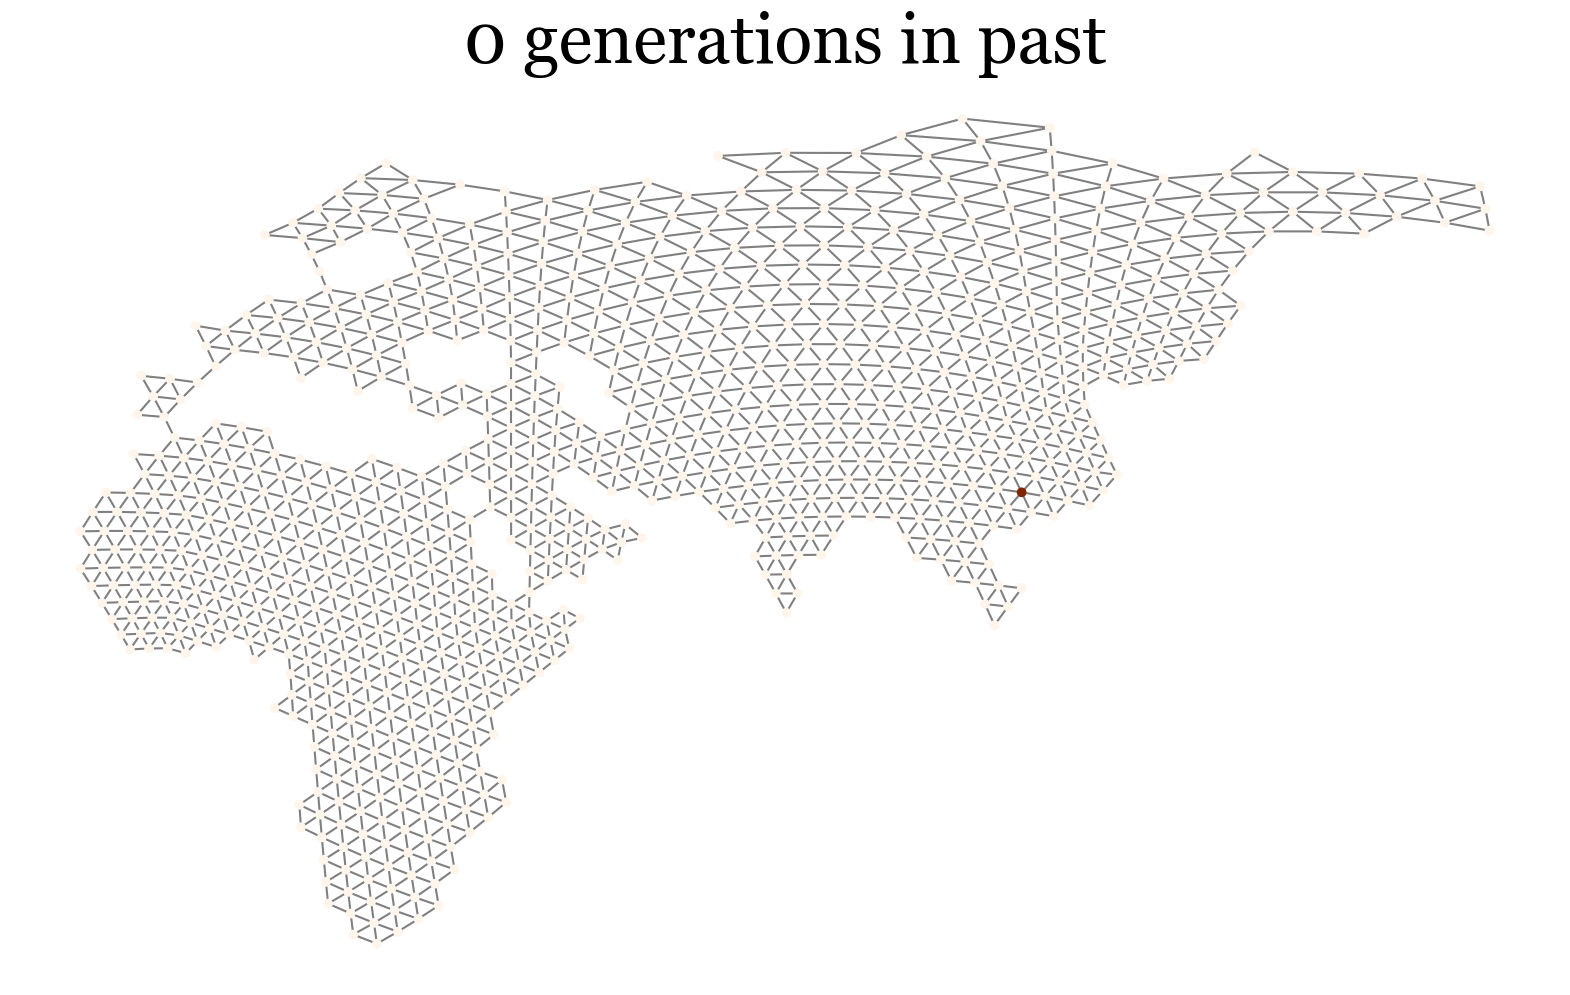


KeyboardInterrupt



KeyboardInterrupt: 

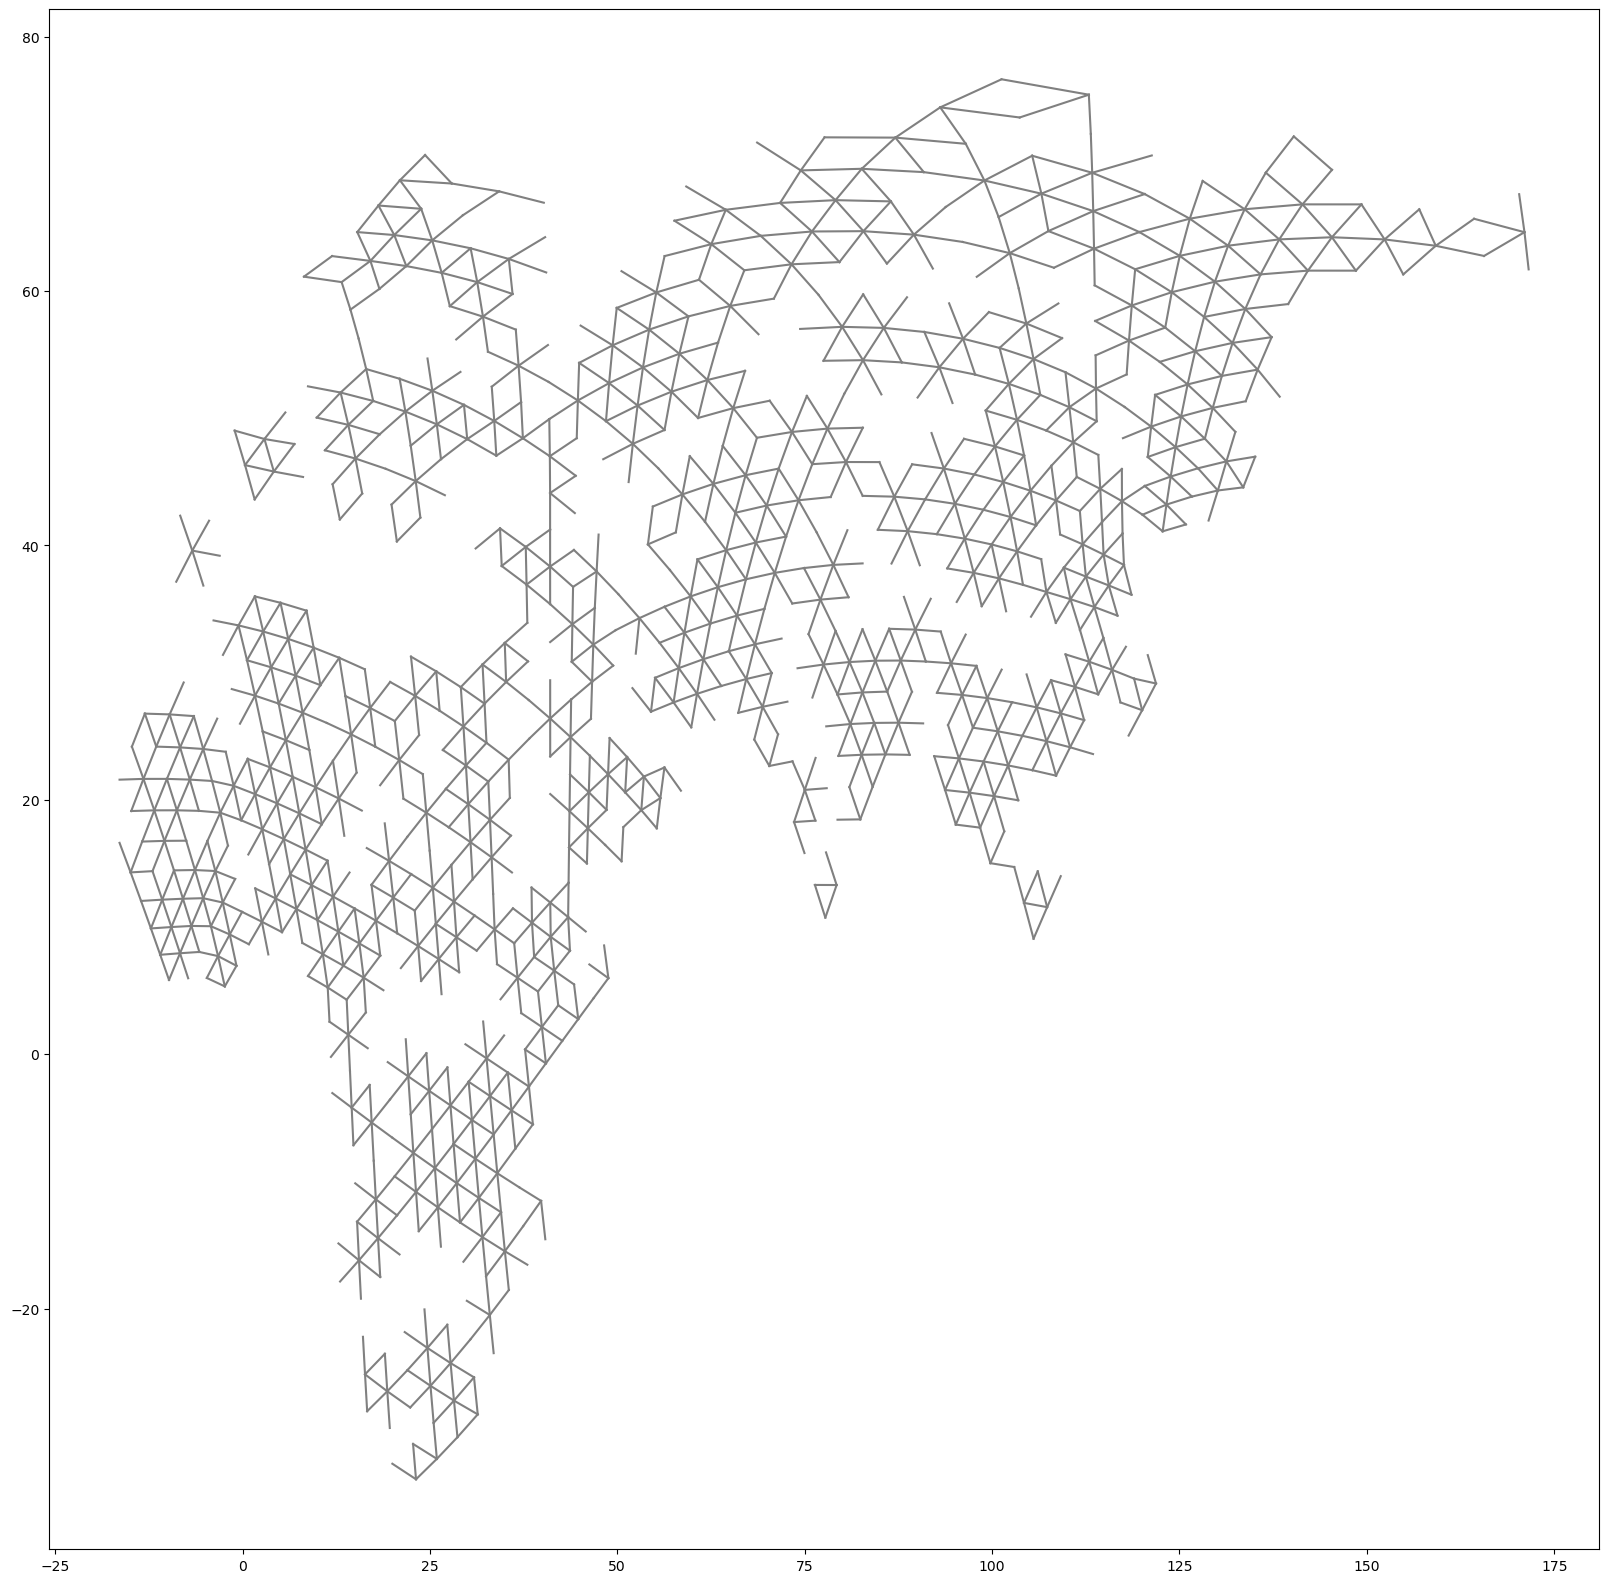

In [12]:
for time in range(0, 20100, 100):
    world_map.draw_estimated_location(
        location_vector=positions_1500[time],
        figsize=(20,20),
        save_to=f"figures/location_gif/complete_sample1500_tree50_t{time}.png",
        title=f"{time} generations in past"
    )

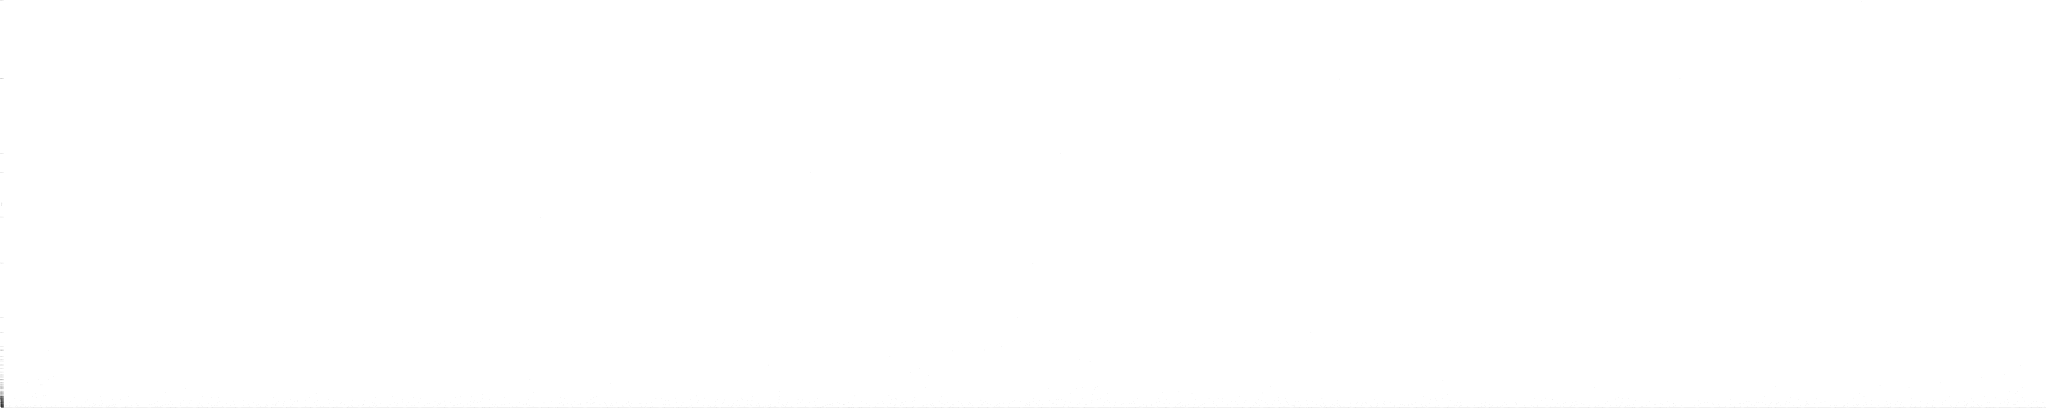

In [4]:

trees[50].draw_svg(size=(50000,10000), node_labels={}, omit_sites=True, y_axis=True)

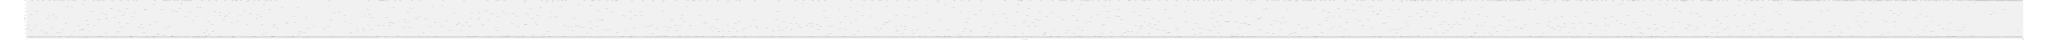

In [20]:
tss = [tskit.load(ts).simplify() for ts in glob(f"datasets/evolution_take_3/trees/*")]
ts50 = tss[50]
chopped = ts50.decapitate(1000)
chopped.draw_svg(path="figures/tree.svg", size=(50000, 1000), omit_sites=True, y_axis=True, y_ticks=range(0,1100,100))

In [56]:
print(glob(f"datasets/evolution_take_3/trees/*")[50])

datasets/evolution_take_3/trees/36750.trees


In [43]:
import tszip
ts = tszip.load("datasets/hgdp_tgp_sgdp_high_cov_ancients_chr17_p.dated.trees.tsz")
ts, map_nodes = ts.simplify(samples=samples["orig_id"], map_nodes=True)

id  deme  orig_id
0        0   238        0
1        1   238        1
2        2   886        2
3        3   886        3
4        4   217        4
...    ...   ...      ...
1901  1901   366     7499
1902  1902   536     7500
1903  1903   536     7501
1904  1904   536     7502
1905  1905   536     7503

[1906 rows x 3 columns]